<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Temporal-Variables" data-toc-modified-id="Temporal-Variables-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Temporal Variables</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Boolean-Features" data-toc-modified-id="Boolean-Features-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Boolean Features</a></span></li><li><span><a href="#Bucketizing-Numerical-Features" data-toc-modified-id="Bucketizing-Numerical-Features-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Bucketizing Numerical Features</a></span></li><li><span><a href="#Dummy-Variables-for-Binned-and-Categorical-Features" data-toc-modified-id="Dummy-Variables-for-Binned-and-Categorical-Features-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Dummy Variables for Binned and Categorical Features</a></span></li><li><span><a href="#Log-Transform-Large-Numerical-Features" data-toc-modified-id="Log-Transform-Large-Numerical-Features-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Log Transform Large Numerical Features</a></span></li><li><span><a href="#Combine-All-Features-to-One-Column" data-toc-modified-id="Combine-All-Features-to-One-Column-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Combine All Features to One Column</a></span></li></ul></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Train-Test-Splitting" data-toc-modified-id="Train-Test-Splitting-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Train Test Splitting</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Model-Predictions" data-toc-modified-id="Model-Predictions-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>Model Predictions</a></span></li><li><span><a href="#Model-Evaluation-Metrics" data-toc-modified-id="Model-Evaluation-Metrics-9.1.3"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>Model Evaluation Metrics</a></span></li><li><span><a href="#Model-Evaluation-using-ml.evaluation" data-toc-modified-id="Model-Evaluation-using-ml.evaluation-9.1.4"><span class="toc-item-num">9.1.4&nbsp;&nbsp;</span>Model Evaluation using ml.evaluation</a></span></li></ul></li><li><span><a href="#Elastic-Net-Regression" data-toc-modified-id="Elastic-Net-Regression-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Elastic Net Regression</a></span></li><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Parameter-Tuning" data-toc-modified-id="Parameter-Tuning-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Parameter Tuning</a></span></li></ul></li><li><span><a href="#Feature-Importances" data-toc-modified-id="Feature-Importances-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Feature Importances</a></span></li></ul></div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Try to estimate the price based on given features.
![](../data/raw/data_description.png)

# Imports

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
random_state=100
np.random.seed=random_state
np.random.set_state=random_state

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 50)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.1'), ('pandas', '0.25.1'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [10]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [11]:
# pyspark
import pyspark
spark = pyspark.sql.SparkSession.builder.appName('bhishan').getOrCreate()
print([(x.__name__,x.__version__) for x in [np, pd, pyspark]])

[('numpy', '1.17.1'), ('pandas', '0.25.1'), ('pyspark', '2.4.4')]


In [12]:
# pyspark sql
from pyspark.sql.functions import col
from pyspark.sql.functions import udf # @udf("integer") def myfunc(x,y): return x - y
from pyspark.sql import functions as F # stddev format_number date_format, dayofyear, when
from pyspark.sql.types import StructField, StringType, IntegerType, FloatType, StructType, DateType

In [13]:
# pyspark ml feature
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import OneHotEncoder,OneHotEncoderEstimator
from pyspark.ml.feature import Bucketizer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

In [14]:
# regressors
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.regression import GBTRegressor

In [15]:
# cross validation
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import CrossValidatorModel

In [16]:
# model evaluation regression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics

# Useful Scripts

In [88]:
def show_method_attributes(method, ncols=2):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [I for I in dir(method) if I[0].islower()]
    x = [I for I in x if I not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

# Load the data

In [17]:
!head  ../data/raw/kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

In [18]:
df = spark.read.csv('../data/raw/kc_house_data.csv', header=True, inferSchema=True).cache()
print('nrows = ', df.count(), 'ncols = ', len(df.columns))
df.limit(5).toPandas()

nrows =  21613 ncols =  21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



In [20]:
print(df.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


# EDA

In [21]:
df.select(['price','sqft_living']).show(5)

+------+-----------+
| price|sqft_living|
+------+-----------+
|221900|       1180|
|538000|       2570|
|180000|        770|
|604000|       1960|
|510000|       1680|
+------+-----------+
only showing top 5 rows



In [22]:
df.select(F.mean('price'), F.max('price')).show()

+-----------+----------+
| avg(price)|max(price)|
+-----------+----------+
|540088.1418|   7700000|
+-----------+----------+



In [23]:
df.select([x(df['sqft_living']) 
           for x in [F.max, F.min ]]).show()

+----------------+----------------+
|max(sqft_living)|min(sqft_living)|
+----------------+----------------+
|           13540|             290|
+----------------+----------------+



In [24]:
df.select('grade').distinct().show()

+-----+
|grade|
+-----+
|   12|
|    1|
|   13|
|    6|
|    3|
|    5|
|    9|
|    4|
|    8|
|    7|
|   10|
|   11|
+-----+



In [25]:
df.groupBy('bedrooms').agg(F.max('price')).show()

+--------+----------+
|bedrooms|max(price)|
+--------+----------+
|       1|   1247000|
|       6|   7700000|
|       3|   3800000|
|       5|   7062500|
|       9|   1400000|
|       4|   4489000|
|       8|   3300000|
|       7|   3200000|
|      10|   1148000|
|      11|    520000|
|      33|    640000|
|       2|   3278000|
|       0|   1295650|
+--------+----------+



In [26]:
df.filter(df['price']>10000).agg({'grade': 'count'}).show()

+------------+
|count(grade)|
+------------+
|       21613|
+------------+



In [27]:
df.select('date').filter(df['date'].like('2014%')).show(2)

+---------------+
|           date|
+---------------+
|20141013T000000|
|20141209T000000|
+---------------+
only showing top 2 rows



In [28]:
df.select('id', 'bedrooms').filter(df['bedrooms'].isin(1,2)).show(2)

+----------+--------+
|        id|bedrooms|
+----------+--------+
|5631500400|       2|
|9212900260|       2|
+----------+--------+
only showing top 2 rows



In [29]:
view_grp =  df.groupBy("view").count().sort("view", ascending=False)

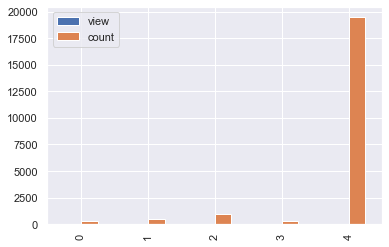

In [30]:
view_grp.toPandas().plot.bar()

In [31]:
df.drop('date').describe().toPandas().set_index('summary').astype(float).round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
summary,,,,,,,,,,,,,,,,,,,,
count,2.161300e+04,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4.580302e+09,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
stddev,2.876566e+09,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1.000102e+06,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


# Feature Engineering

## Temporal Variables

In [32]:
df = df.withColumn('yr_sales', df['date'].substr(1, 4).cast(IntegerType()))
df.select('date','yr_sales').show(2)

+---------------+--------+
|           date|yr_sales|
+---------------+--------+
|20141013T000000|    2014|
|20141209T000000|    2014|
+---------------+--------+
only showing top 2 rows



In [33]:
df = df.withColumn('age', df['yr_sales'] - df['yr_built'])
df.select('yr_sales','yr_built','age').show(5)

+--------+--------+---+
|yr_sales|yr_built|age|
+--------+--------+---+
|    2014|    1955| 59|
|    2014|    1951| 63|
|    2015|    1933| 82|
|    2014|    1965| 49|
|    2015|    1987| 28|
+--------+--------+---+
only showing top 5 rows



In [34]:
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             21613|
|   mean| 43.31781797991949|
| stddev|29.375492803877584|
|    min|                -1|
|    max|               115|
+-------+------------------+



In [35]:
df.limit(5).toPandas()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [36]:
# I can see some negative numbers.
df.select('id', 'yr_sales', 'yr_built', 'age').filter(df['age'] == -1).show(5)

+----------+--------+--------+---+
|        id|yr_sales|yr_built|age|
+----------+--------+--------+---+
|1832100030|    2014|    2015| -1|
|3076500830|    2014|    2015| -1|
|9520900210|    2014|    2015| -1|
|1250200495|    2014|    2015| -1|
|2770601530|    2014|    2015| -1|
+----------+--------+--------+---+
only showing top 5 rows



In [37]:
# some houses are sold before they are constructed.
# df.filter(df['age'] == -1).toPandas()


In [38]:
df.filter(df['age'] == -1).count()

12

## Categorical Features

In [39]:
print(df.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age']


In [40]:
cols_cat = ['bedrooms'] 

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index")
            for column in cols_cat]

encoder = OneHotEncoderEstimator(
    inputCols=[indexer.getOutputCol() for indexer in indexers],
    outputCols=["{0}_encoded".format(indexer.getOutputCol()) for indexer in indexers]
)

assembler = VectorAssembler(
    inputCols=encoder.getOutputCols(),
    outputCol="features_encoded_vec"
)

pipeline = Pipeline(stages=indexers + [encoder, assembler])
df = pipeline.fit(df).transform(df)

df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)
 |-- yr_sales: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- bedrooms_index: double (nullable = false)
 |-- bedrooms_index_

## Boolean Features

In [41]:
df = df.withColumn('basement_bool', (col('sqft_basement') > 0).cast(IntegerType()) )
df.select('sqft_basement','basement_bool').show(2)

+-------------+-------------+
|sqft_basement|basement_bool|
+-------------+-------------+
|            0|            0|
|          400|            1|
+-------------+-------------+
only showing top 2 rows



## Bucketizing Numerical Features

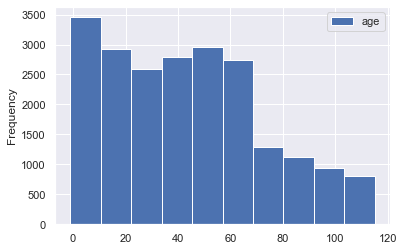

In [42]:
# sampling is discouraged in pyspark, we can check some top rows
# but this dataset is small and even pandas can handle this one.

df.select('age').toPandas().plot.hist()

In [43]:
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             21613|
|   mean| 43.31781797991949|
| stddev|29.375492803877584|
|    min|                -1|
|    max|               115|
+-------+------------------+



In [44]:
# there is no easy way to get max or min in pyspark
age_min = df.agg({"age": "min"}).collect()[0][0]
age_max = df.agg({"age": "max"}).collect()[0][0] 

age_min, age_max

(-1, 115)

In [45]:
splits = np.linspace(age_min, age_max+1, 10)
splits

array([ -1.,  12.,  25.,  38.,  51.,  64.,  77.,  90., 103., 116.])

In [46]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=splits,inputCol="age", outputCol="age_cat")

df = bucketizer.setHandleInvalid("keep").transform(df)

df.select('age','age_cat').show(5)

+---+-------+
|age|age_cat|
+---+-------+
| 59|    4.0|
| 63|    4.0|
| 82|    6.0|
| 49|    3.0|
| 28|    2.0|
+---+-------+
only showing top 5 rows



## Dummy Variables for Binned and Categorical Features

In [47]:
cols_cat = ['age_cat'] 

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index")
            for column in cols_cat]

encoder = OneHotEncoderEstimator(
    inputCols=[indexer.getOutputCol() for indexer in indexers],
    outputCols=["{0}_encoded".format(indexer.getOutputCol()) for indexer in indexers]
)

assembler = VectorAssembler(
    inputCols=encoder.getOutputCols(),
    outputCol="age_cat_vec"
)

pipeline = Pipeline(stages=indexers + [encoder, assembler])
df = pipeline.fit(df).transform(df)

df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)
 |-- yr_sales: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- bedrooms_index: double (nullable = false)
 |-- bedrooms_index_

In [48]:
df.select('age','age_cat','age_cat_index','age_cat_index_encoded').show(5)

+---+-------+-------------+---------------------+
|age|age_cat|age_cat_index|age_cat_index_encoded|
+---+-------+-------------+---------------------+
| 59|    4.0|          2.0|        (8,[2],[1.0])|
| 63|    4.0|          2.0|        (8,[2],[1.0])|
| 82|    6.0|          7.0|        (8,[7],[1.0])|
| 49|    3.0|          4.0|        (8,[4],[1.0])|
| 28|    2.0|          1.0|        (8,[1],[1.0])|
+---+-------+-------------+---------------------+
only showing top 5 rows



## Log Transform Large Numerical Features

In [49]:
df.select('sqft_living').withColumn('log1p_sqft_living', F.log1p("sqft_living")).show(2)

+-----------+-----------------+
|sqft_living|log1p_sqft_living|
+-----------+-----------------+
|       1180|7.074116816197362|
|       2570|7.852050207265889|
+-----------+-----------------+
only showing top 2 rows



In [50]:
np.log1p(1180)

7.074116816197362

In [51]:
cols_log = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
            'sqft_basement', 'sqft_living15', 'sqft_lot15']

for c in cols_log:
    df = df.withColumn('log1p_' + c , F.log1p(c))

In [52]:
print(df.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'bedrooms_index', 'bedrooms_index_encoded', 'features_encoded_vec', 'basement_bool', 'age_cat', 'age_cat_index', 'age_cat_index_encoded', 'age_cat_vec', 'log1p_price', 'log1p_sqft_living', 'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15']


In [53]:
df.select(['log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15']).show(2)

+-------------------+-------------------+-----------------+
|log1p_sqft_basement|log1p_sqft_living15| log1p_sqft_lot15|
+-------------------+-------------------+-----------------+
|                0.0|  7.201170883281678|8.639587799629844|
|  5.993961427306569|   7.43307534889858|8.941152882160566|
+-------------------+-------------------+-----------------+
only showing top 2 rows



In [54]:
cols_after_log = ['log1p_' + i for i in cols_log]
cols_after_log

['log1p_price',
 'log1p_sqft_living',
 'log1p_sqft_lot',
 'log1p_sqft_above',
 'log1p_sqft_basement',
 'log1p_sqft_living15',
 'log1p_sqft_lot15']

## Combine All Features to One Column

In [55]:
print(df.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'bedrooms_index', 'bedrooms_index_encoded', 'features_encoded_vec', 'basement_bool', 'age_cat', 'age_cat_index', 'age_cat_index_encoded', 'age_cat_vec', 'log1p_price', 'log1p_sqft_living', 'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15']


In [56]:
selected_features = [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [57]:
assembler = VectorAssembler(
    inputCols= selected_features,
    outputCol='features'
)

df = assembler.transform(df)

df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)
 |-- yr_sales: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- bedrooms_index: double (nullable = false)
 |-- bedrooms_index_

# Feature Scaling

In [58]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
df = scaler.fit(df).transform(df)

df.select(["features","features_scaled"]).limit(2).toPandas()

,features,features_scaled
0,"[3.0, 1.0, 1180.0, 5650.0, 1.0, 0.0, 0.0, 3.0,...","[3.2255919977909313, 1.2984261719459003, 1.284..."
1,"[3.0, 2.25, 2570.0, 7242.0, 2.0, 0.0, 0.0, 3.0...","[3.2255919977909313, 2.9214588868782756, 2.798..."


# Train Test Splitting

In [59]:
train, test = df.randomSplit([0.8,0.2], seed=random_state)
train.count(), test.count()

(17323, 4290)

# Modelling

## Linear Regression

In [60]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='features_scaled',
                      labelCol='price',
                     predictionCol='prediction',
                     maxIter=10).fit(df)

### Model Evaluation

In [62]:
show_method_attributes(lr,7)

,0,1,2,3,4,5,6
0,aggregationDepth,explainParam,getParam,isSet,params,scale,tol
1,coefficients,explainParams,hasDefault,labelCol,predictionCol,set,transform
2,copy,extractParamMap,hasParam,load,read,solver,uid
3,elasticNetParam,featuresCol,hasSummary,loss,regParam,standardization,weightCol
4,epsilon,fitIntercept,intercept,maxIter,save,summary,write
5,evaluate,getOrDefault,isDefined,numFeatures,,,


In [63]:
lr.coefficients

DenseVector([-33265.0953, 31687.8075, 6008989.6808, 5326.5894, 3612.2834, 50436.1052, 40515.9324, 17170.2772, 112715.2636, -5267793.1233, -2829159.902, -76964.894, 7958.3034, -31162.3941, 83519.0309, -30240.0468, 14860.2427, -10447.7218])

In [64]:
lr.intercept

6690330.8435488995

In [65]:
df_coeff = pd.DataFrame({"Feature": ["Intercept"] + selected_features,
  "Co-efficients": np.insert(lr.coefficients.toArray(), 0, lr.intercept)})


df_coeff

,Feature,Co-efficients
0,Intercept,6.690331e+06
1,bedrooms,-3.326510e+04
2,bathrooms,3.168781e+04
3,sqft_living,6.008990e+06
4,sqft_lot,5.326589e+03
5,floors,3.612283e+03
6,waterfront,5.043611e+04
7,view,4.051593e+04
8,condition,1.717028e+04
9,grade,1.127153e+05


### Model Predictions

In [66]:
preds = lr.transform(test)
preds.select('price', 'prediction').show(5)

+------+------------------+
| price|        prediction|
+------+------------------+
|235000|225548.18837336078|
|178000|293933.70595353097|
|487000| 639513.5238347957|
|281000|114608.27346567344|
|465000| 453320.0125229405|
+------+------------------+
only showing top 5 rows



In [67]:
preds_and_labels = preds.select(['prediction','price'])
preds_and_labels.show(5)

+------------------+------+
|        prediction| price|
+------------------+------+
|225548.18837336078|235000|
|293933.70595353097|178000|
| 639513.5238347957|487000|
|114608.27346567344|281000|
| 453320.0125229405|465000|
+------------------+------+
only showing top 5 rows



### Model Evaluation Metrics

In [68]:
show_method_attributes(lr.summary,5)

,0,1,2,3,4
0,coefficientStandardErrors,featuresCol,numInstances,predictions,rootMeanSquaredError
1,degreesOfFreedom,labelCol,objectiveHistory,r2,tValues
2,devianceResiduals,meanAbsoluteError,pValues,r2adj,totalIterations
3,explainedVariance,meanSquaredError,predictionCol,residuals,


In [69]:
print([i for i in dir(lr.summary) if i[0].islower()])

['coefficientStandardErrors', 'degreesOfFreedom', 'devianceResiduals', 'explainedVariance', 'featuresCol', 'labelCol', 'meanAbsoluteError', 'meanSquaredError', 'numInstances', 'objectiveHistory', 'pValues', 'predictionCol', 'predictions', 'r2', 'r2adj', 'residuals', 'rootMeanSquaredError', 'tValues', 'totalIterations']


In [70]:
metrics = [ 'explainedVariance', 'meanAbsoluteError',
           'r2', 'r2adj',  'rootMeanSquaredError']

metrics_values = [getattr(lr.summary,m) for m in metrics]

df_metrics = pd.DataFrame({'metric': metrics,
                          'values': metrics_values})

df_metrics

,metric,values
0,explainedVariance,9.430923e+10
1,meanAbsoluteError,1.259226e+05
2,r2,6.997472e-01
3,r2adj,6.994969e-01
4,rootMeanSquaredError,2.011639e+05


### Model Evaluation using ml.evaluation

In [71]:
from pyspark.ml.evaluation import RegressionEvaluator


metrics = ['rmse','mae','r2']
metrics_values = [ RegressionEvaluator(predictionCol="prediction",
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,193679.667761
1,mae,124786.249732
2,r2,0.717238


## Elastic Net Regression

In [72]:
pred_col = 'prediction_elasticnet'

model = (LinearRegression(featuresCol='features_scaled',
                       labelCol="price",
                       predictionCol=pred_col,
                       maxIter=10,
                       regParam=0.3,
                       elasticNetParam=0.8,
                       standardization=False)
     )

model = model.fit(train)
preds = model.transform(test)
preds_and_labels = preds.select([pred_col,'price'])

metrics = ['rmse','mae','r2']

metrics_values = [ RegressionEvaluator(predictionCol=pred_col,
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,193975.893391
1,mae,125668.434025
2,r2,0.716372


## Decision Tree Regressor

In [73]:
from pyspark.ml.regression import DecisionTreeRegressor

pred_col = 'prediction_dtree'
model = DecisionTreeRegressor(featuresCol='features_scaled',
                       labelCol="price",
                       predictionCol=pred_col,
                       seed=random_state
                       )

model = model.fit(train)
preds = model.transform(test)
preds_and_labels = preds.select([pred_col,'price'])

metrics = ['rmse','mae','r2']

metrics_values = [ RegressionEvaluator(predictionCol=pred_col,
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,184587.818978
1,mae,113562.302351
2,r2,0.743162


## Random Forest Regressor

In [74]:
from pyspark.ml.regression import RandomForestRegressor

pred_col = 'prediction_rf'
model = RandomForestRegressor(featuresCol='features_scaled',
                       labelCol="price",
                       predictionCol=pred_col,
                       seed=random_state
                       )

model = model.fit(train)
preds_rf = model.transform(test)
preds_and_labels = preds_rf.select([pred_col,'price'])

metrics = ['rmse','mae','r2']

metrics_values = [ RegressionEvaluator(predictionCol=pred_col,
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,171490.447891
1,mae,105460.153789
2,r2,0.778316


## Parameter Tuning

In [75]:
print(train.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'bedrooms_index', 'bedrooms_index_encoded', 'features_encoded_vec', 'basement_bool', 'age_cat', 'age_cat_index', 'age_cat_index_encoded', 'age_cat_vec', 'log1p_price', 'log1p_sqft_living', 'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15', 'features', 'features_scaled']


In [76]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
import time

t0 = time.time()

model_rf = RandomForestRegressor(labelCol = "price", numTrees = 50, seed=random_state)

grid_depths = [10,20]
paramGrid = ParamGridBuilder()\
   .addGrid(model_rf.maxDepth, grid_depths)\
   .addGrid(model_rf.minInstancesPerNode, grid_depths)\
   .build()

pipeline = Pipeline(stages = [model_rf])

evaluator = RegressionEvaluator(labelCol = "price",
                                predictionCol = "prediction",
                                metricName = "r2") 

crossval = CrossValidator(estimator = pipeline,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluator,
                          seed = random_state,
                          parallelism=50, # number of threads to use
                          numFolds = 5)


model_cv = crossval.fit(train)

t1 = time.time() - t0
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(t1,60)))
# Time taken: 5 min 40 secs with parallelism 1  (5 folds, numtree = 50)
# 3min 22 sec with 10 threads
# 3min 18 sec with 50 threads

Time taken: 3 min 41 secs


In [77]:
show_method_attributes(model_cv,7)

,0,1,2,3,4,5,6
0,avgMetrics,evaluator,getEstimatorParamMaps,hasDefault,params,setEstimator,subModels
1,bestModel,explainParam,getEvaluator,hasParam,read,setEstimatorParamMaps,transform
2,copy,explainParams,getOrDefault,isDefined,save,setEvaluator,uid
3,estimator,extractParamMap,getParam,isSet,seed,setSeed,write
4,estimatorParamMaps,getEstimator,getSeed,load,set,,


In [78]:
prediction = model_cv.transform(test)

In [79]:
print(prediction.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'bedrooms_index', 'bedrooms_index_encoded', 'features_encoded_vec', 'basement_bool', 'age_cat', 'age_cat_index', 'age_cat_index_encoded', 'age_cat_vec', 'log1p_price', 'log1p_sqft_living', 'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15', 'features', 'features_scaled', 'prediction']


In [80]:
evaluator.evaluate(model_cv.transform(test)) # gives r2 for test data

0.8720945704985017

In [81]:
model_cv.bestModel.stages

[RandomForestRegressionModel (uid=RandomForestRegressor_4aa1dca99180) with 50 trees]

In [82]:
model_cv.params

[Param(parent='CrossValidatorModel_c013b85a0a76', name='estimator', doc='estimator to be cross-validated'),
 Param(parent='CrossValidatorModel_c013b85a0a76', name='estimatorParamMaps', doc='estimator param maps'),
 Param(parent='CrossValidatorModel_c013b85a0a76', name='evaluator', doc='evaluator used to select hyper-parameters that maximize the validator metric'),
 Param(parent='CrossValidatorModel_c013b85a0a76', name='seed', doc='random seed.')]

In [83]:
pred_col = 'prediction'
preds_and_labels = prediction.select([pred_col,'price'])

metrics = ['rmse','mae','r2']

metrics_values = [ RegressionEvaluator(predictionCol=pred_col,
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,130261.997616
1,mae,74422.817688
2,r2,0.872095


# Feature Importances

In [84]:
model_cv.bestModel.stages[-1].featureImportances

SparseVector(18, {0: 0.0038, 1: 0.0559, 2: 0.2632, 3: 0.0098, 4: 0.0025, 5: 0.0252, 6: 0.0269, 7: 0.0036, 8: 0.2335, 9: 0.0397, 10: 0.0133, 11: 0.0343, 12: 0.0022, 13: 0.0189, 14: 0.1467, 15: 0.0558, 16: 0.0534, 17: 0.0114})

In [85]:
prediction.schema["features"].metadata["ml_attr"]["attrs"]

{'numeric': [{'idx': 0, 'name': 'bedrooms'},
  {'idx': 1, 'name': 'bathrooms'},
  {'idx': 2, 'name': 'sqft_living'},
  {'idx': 3, 'name': 'sqft_lot'},
  {'idx': 4, 'name': 'floors'},
  {'idx': 5, 'name': 'waterfront'},
  {'idx': 6, 'name': 'view'},
  {'idx': 7, 'name': 'condition'},
  {'idx': 8, 'name': 'grade'},
  {'idx': 9, 'name': 'sqft_above'},
  {'idx': 10, 'name': 'sqft_basement'},
  {'idx': 11, 'name': 'yr_built'},
  {'idx': 12, 'name': 'yr_renovated'},
  {'idx': 13, 'name': 'zipcode'},
  {'idx': 14, 'name': 'lat'},
  {'idx': 15, 'name': 'long'},
  {'idx': 16, 'name': 'sqft_living15'},
  {'idx': 17, 'name': 'sqft_lot15'}]}

In [86]:
# https://stackoverflow.com/questions/42935914/how-to-map-features-from-the-output-of-a-vectorassembler-back-to-the-column-name
def get_feature_importance_df(model_cv, dataset, featuresCol):
    feat_imp = model_cv.bestModel.stages[-1].featureImportances
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract += dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
        
    pandas_df_feat_imp = pd.DataFrame(list_extract)
    pandas_df_feat_imp['importance'] = pandas_df_feat_imp['idx'].apply(lambda x: feat_imp[x])
    pandas_df_feat_imp = pandas_df_feat_imp.sort_values('importance', ascending = False)
    
    return pandas_df_feat_imp

In [87]:
pandas_df_feat_imp = get_feature_importance_df(model_cv, prediction, "features")
pandas_df_feat_imp.style.background_gradient(subset=['importance'])

,idx,name,importance
2,2,sqft_living,0.26316
8,8,grade,0.233472
14,14,lat,0.146669
1,1,bathrooms,0.0559069
15,15,long,0.0558219
16,16,sqft_living15,0.0533512
9,9,sqft_above,0.0396954
11,11,yr_built,0.0342701
6,6,view,0.0269099
5,5,waterfront,0.0251735
